# Car Price Prediction with Machine Learning

### 1. Import Libraries and Data

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('car_data.csv')

### 2. Exploratory Data Analysis

2.1 First few rows of dataset

In [11]:
print(" First few rows of the dataset:")
df.head()

 First few rows of the dataset:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
df.shape

(301, 9)

   2.2  Summary Statistics

In [15]:
df.describe().style.format(precision=2).background_gradient(cmap='BuPu')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,2013.63,4.66,7.63,36947.21,0.04
std,2.89,5.08,8.64,38886.88,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.90,1.20,15000.00,0.00
50%,2014.00,3.60,6.40,32000.00,0.00
75%,2016.00,6.00,9.90,48767.00,0.00
max,2018.00,35.00,92.60,500000.00,3.00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB




2.3 Check for missing values





In [20]:
print('Missing Values:')
df.isnull().sum()

Missing Values:


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


2.4 Data Types


In [22]:
print(" Data types of columns:")
print(df.dtypes)

 Data types of columns:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object



2.5  Check for duplicates


In [23]:
print('Duplicate Values:')
df.duplicated().sum()

Duplicate Values:


2

In [24]:
# drop duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

### 3. Visualizing data and conducting exploratory analysis.

3.1 Check for Outliers

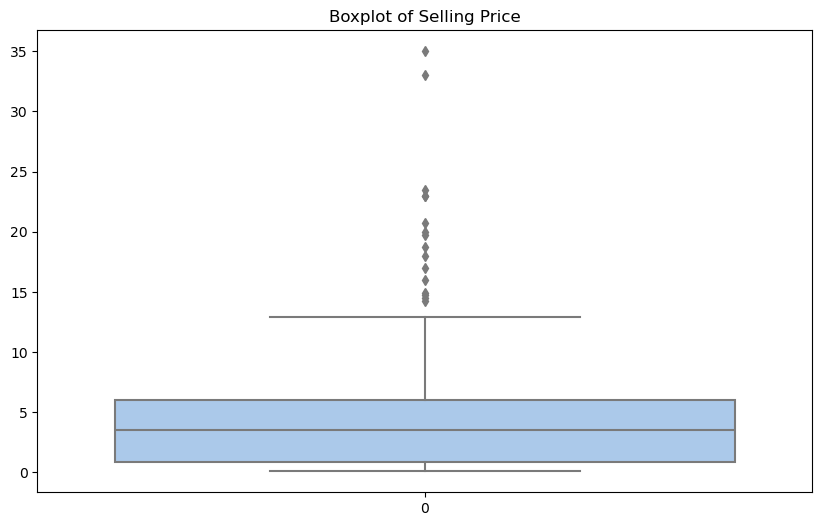

In [25]:
# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(df['Selling_Price'],palette='pastel')
plt.title('Boxplot of Selling Price')
plt.show()

3.2  Correlation Heatmap

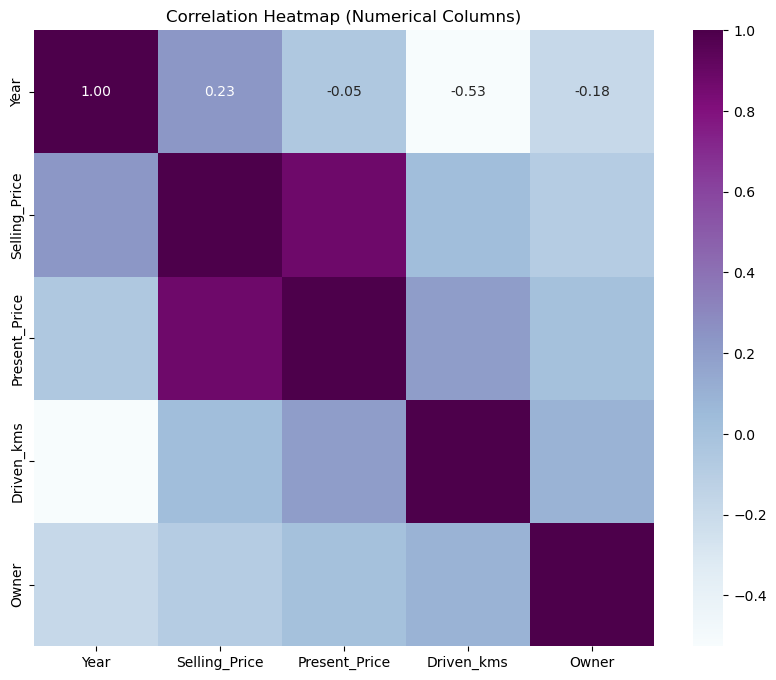

In [27]:
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

### Summary

### Strong Positive Correlation: 
Selling Price and Present Price show a highly positive correlation, implying a nearly perfect linear connection. This aligns with the expectation that the present market value strongly influences the selling price
### Influence of Year: 
Year exhibits a weak negative correlation with Selling Price, Present Price, and Driven_Kms. Newer cars (with lower Year values) generally command higher selling prices, lower present prices, and fewer driven kilometers.
### Importance of Mileage: 
Driven_Kms demonstrates a weak negative correlation with Selling Price and Present Price. Cars with lower mileage (lower Driven_Kms values) typically sell for higher prices.

3.3 Distribution of Numeric Features

<Figure size 1000x600 with 0 Axes>

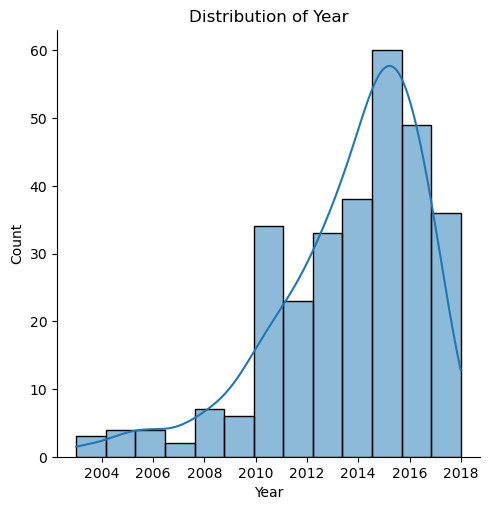

<Figure size 1000x600 with 0 Axes>

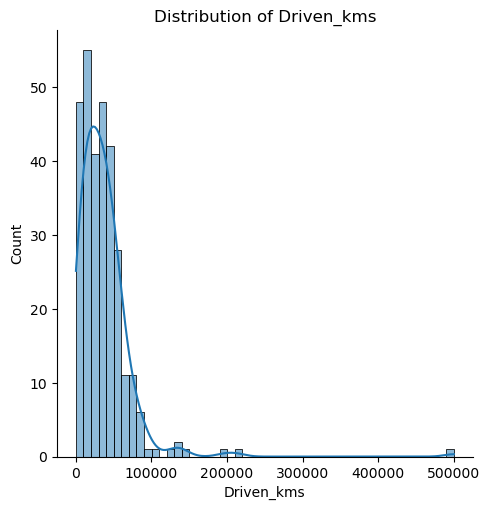

<Figure size 1000x600 with 0 Axes>

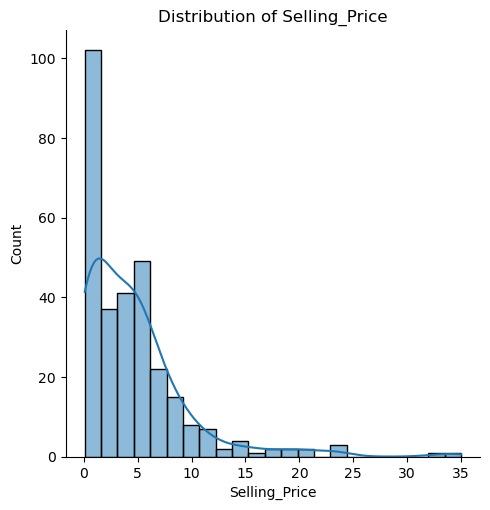

<Figure size 1000x600 with 0 Axes>

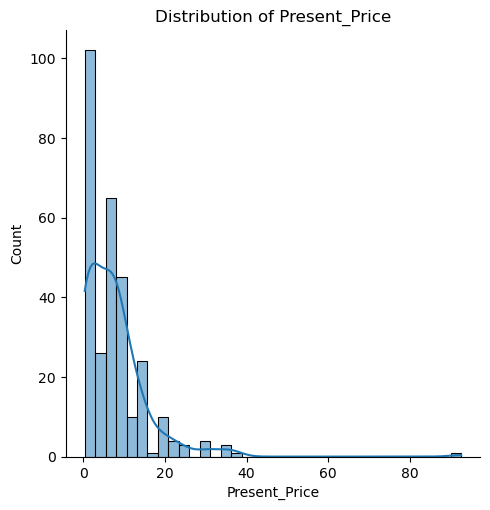

In [28]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

3.4 Scatter Plots

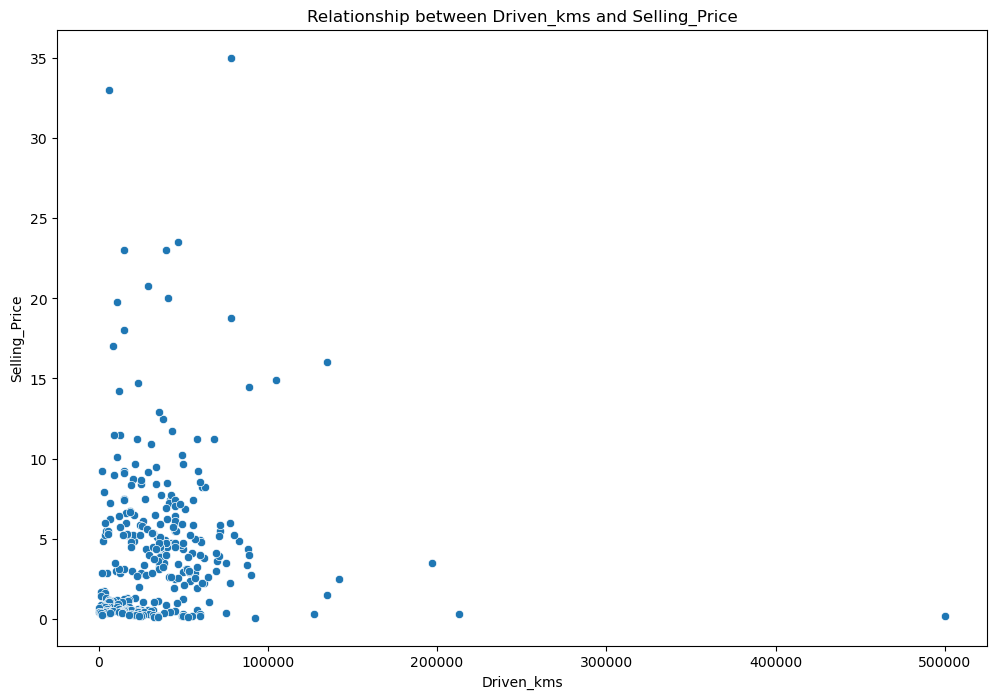

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Relationship between Driven_kms and Selling_Price')
plt.show()

~ The plot suggests a negative correlation between Driven_Kms and Selling_Price. Cars with higher driven kilometers tend to sell for less.

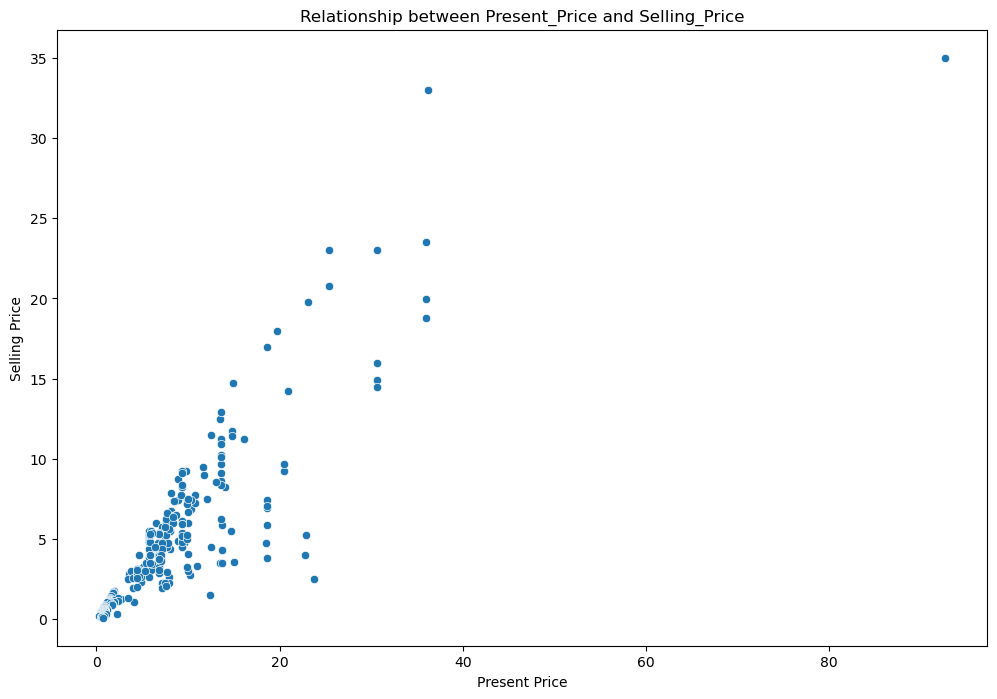

In [30]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Present_Price and Selling_Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

plt.show()

### Findings:

### Price Association: 
The data indicates a robust positive correlation between Present Price and Selling Price. Vehicles with a higher present market value tend to fetch higher selling prices.
### Market Impact: 
This implies that the present market value significantly affects the ultimate selling price.

3.5 Count Plots of Categorical Features

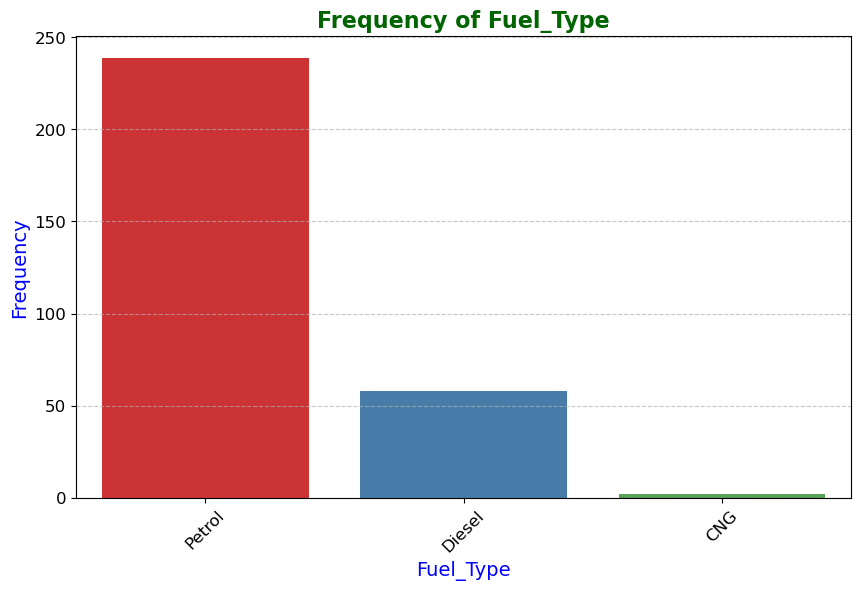

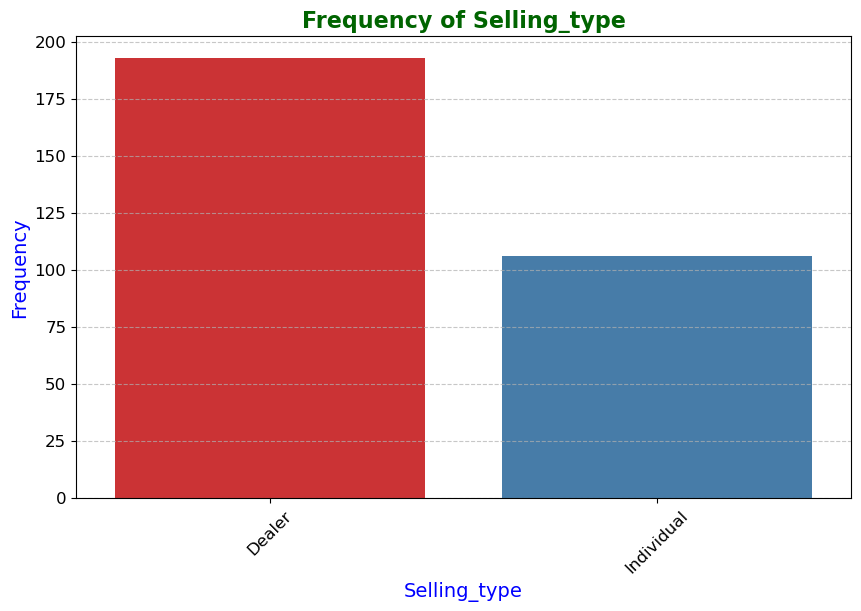

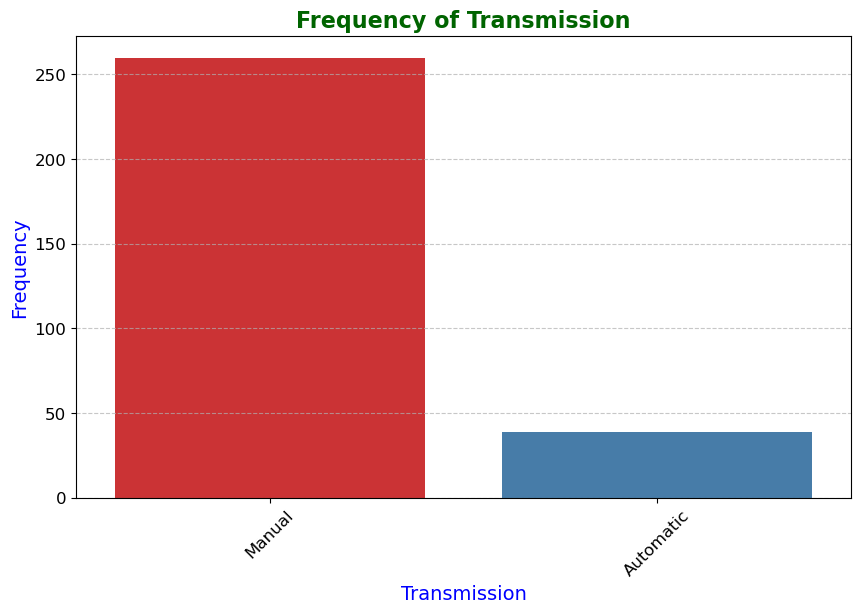

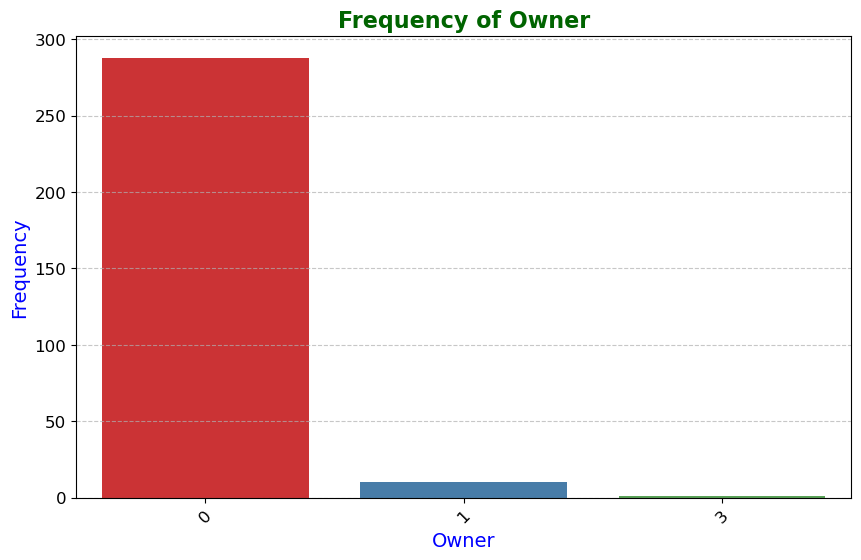

In [33]:
colors = sns.color_palette("Set1")
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, palette=colors)
    plt.title(f'Frequency of {feature}', fontsize=16, color='darkgreen', fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='blue')
    plt.ylabel('Frequency', fontsize=14, color='blue')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

3.6 Top 20 Car Models by Frequency

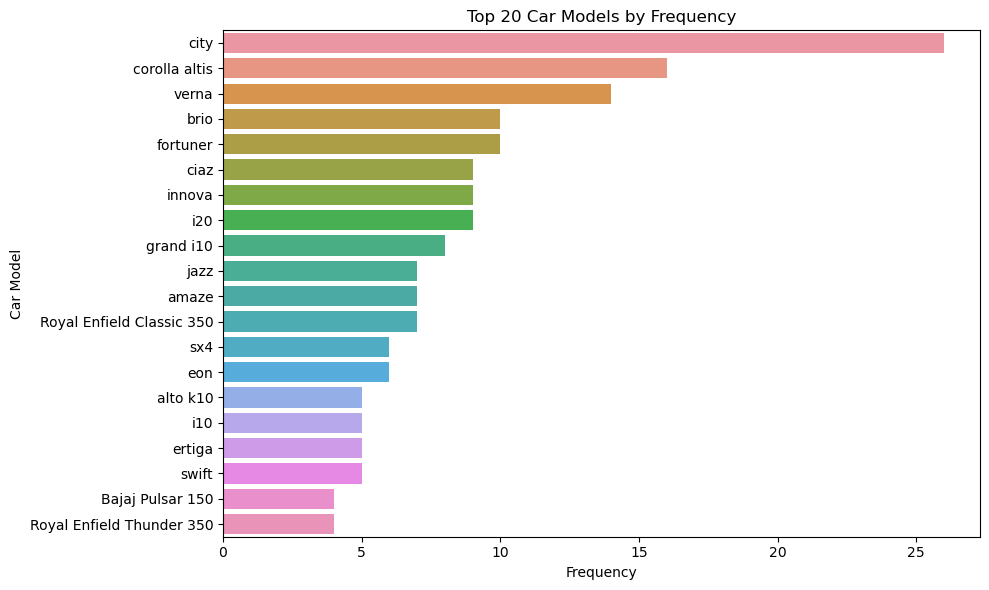

In [34]:
n = 20  
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

3.7 Top 20 Car Models by Average Price

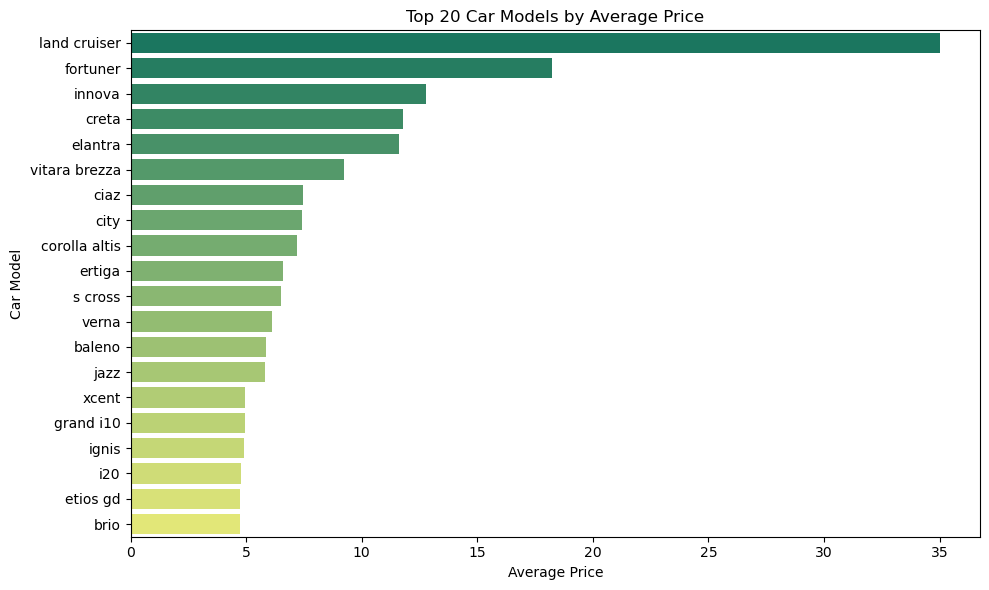

In [35]:
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='summer')
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

### 4. Data Cleaning and Data Transformation

4.1 Check Features

In [37]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


In [38]:
print(df['Selling_type'].value_counts())

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64


In [39]:
print(df['Transmission'].value_counts())

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


4.2 Encode categorical features

In [40]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [41]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### 5. Prediction

5.1 Define target variable

In [42]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [43]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [44]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

5.2 Train and Test Data

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

5.3 Initialize the linear regression model

In [46]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

5.3 Evaluation of Model

In [47]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 6.675444100493366
R-squared: 0.740993435641311


5.4 Predictions

In [48]:
# Make predictions
new_car = [[2022, 20000, 0, 1, 1, 0, 0]]  # Example new car data
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 8829.493382502436
